In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gdp

In [5]:
dat = pd.read_csv("census_team_2015_2019_dat.csv")

In [6]:
dat.head()

,gis join match code,data file year,state postal abbreviation,state name,state code,county name,county code,census tract code,census geographic identifier,area name,...,"educational services, and health care and social assistance (margin of error)","arts, entertainment, and recreation, and accommodation and food services (margin of error)","other services, except public administration (margin of error)",public administration (margin of error),"management, business, science, and arts occupations (margin of error)",service occupations (margin of error),sales and office occupations (margin of error),"natural resources, construction, and maintenance occupations (margin of error)","production, transportation, and material moving occupations (margin of error)",geom
0,G1700010010100,2015-2019,IL,Illinois,17,Adams County,1,10100,14000US17001010100,"Census Tract 101, Adams County, Illinois",...,87,59,51,21,116,70,87,63,69,MULTIPOLYGON (((-87.66368000002299 42.01939800...
1,G1700010010300,2015-2019,IL,Illinois,17,Adams County,1,10300,14000US17001010300,"Census Tract 103, Adams County, Illinois",...,130,102,59,59,192,153,96,96,124,MULTIPOLYGON (((-87.66505999995483 42.01280100...
2,G1700010010400,2015-2019,IL,Illinois,17,Adams County,1,10400,14000US17001010400,"Census Tract 104, Adams County, Illinois",...,123,58,37,32,123,103,104,70,87,MULTIPOLYGON (((-87.65080299995667 41.99848500...
3,G1700010010600,2015-2019,IL,Illinois,17,Adams County,1,10600,14000US17001010600,"Census Tract 106, Adams County, Illinois",...,181,103,48,67,213,112,213,142,190,MULTIPOLYGON (((-87.6657209999605 42.004978999...
4,G1700070010100,2015-2019,IL,Illinois,17,Boone County,7,10100,14000US17007010100,"Census Tract 101, Boone County, Illinois",...,154,165,61,43,257,211,188,152,226,MULTIPOLYGON (((-87.66368000002299 42.01939800...


In [7]:
dat.loc[0,"geom"]

'MULTIPOLYGON (((-87.66368000002299 42.01939800001483, -87.66384199998379 42.01934299999425, -87.66384499997201 42.019291999976055, -87.66388799996729 42.01929099997606, -87.66402199998794 42.01928699996819, -87.664426999966 42.01927600000188, -87.66456199999624 42.01927300002466, -87.66485699995653 42.01926700002526, -87.66526900003693 42.019261000016954, -87.66574199999769 42.01925299999031, -87.66603799998356 42.019248999985074, -87.66647899998809 42.019242000003985, -87.66680599995826 42.0192369999702, -87.66780199999904 42.01922099997764, -87.66824300000113 42.01921400000973, -87.66824300000434 42.01924399999777, -87.66824399998539 42.01933399999238, -87.6682450000291 42.019364999990586, -87.66849500001963 42.01936299996704, -87.66886700002851 42.01936200002525, -87.6692469999824 42.01936299997883, -87.66949799998955 42.01936399999438, -87.66962700003955 42.01936500002597, -87.66974599999376 42.01936500002301, -87.67011899999854 42.01936800000544, -87.67049200003012 42.01937000003

In [8]:
def polygon_graph(datapoint):
    a = datapoint.replace("MULTIPOLYGON ", "")
    a = a.replace("(", "")
    a = a.replace(")", "")
    b = []
    c = {}
    last = 0
    for i in range(len(a)):
        if a[i] == ",":
            b.append(a[last:i])
            last = i
    for i in range(len(b)):
        if i == 0:
            pass
        else:
            b[i] = b[i][2:]
    curr = 0
    for i in range(len(b)):
        for j in range(len(b[i])):
            if b[i][j] == " ":
                key = float(b[i][curr:j])
                value = float(b[i][j+1:])
                c[key] = value
                curr = 0
                break
    x = [i for i,j in c.items()]
    y = [j for i,j in c.items()]
    return x, y

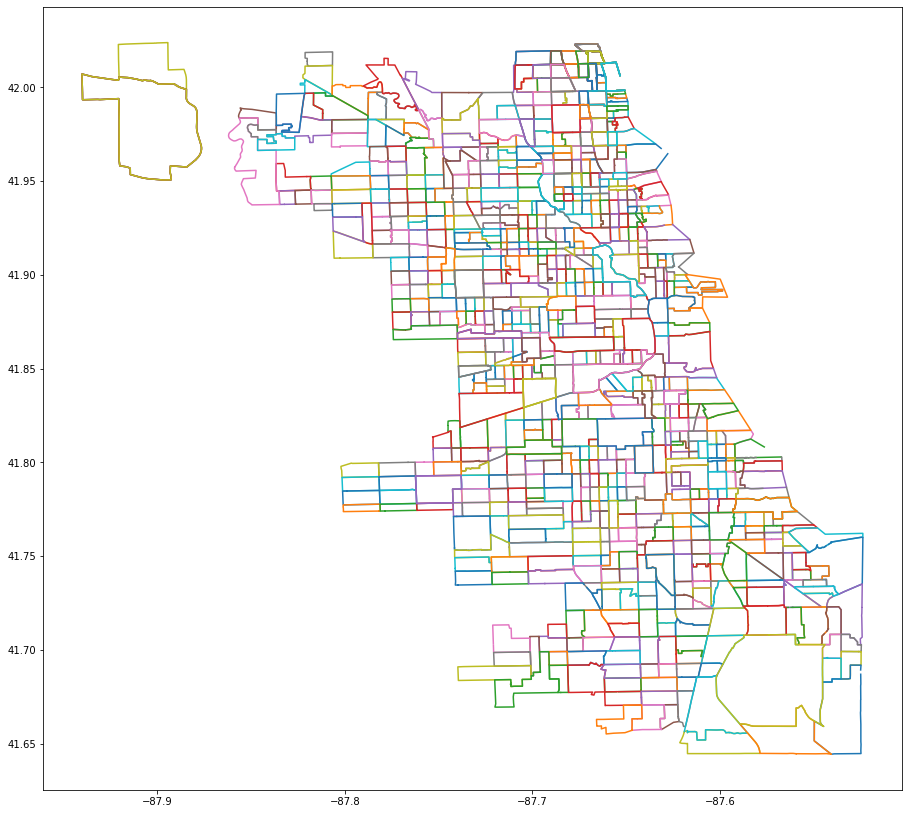

In [9]:
fig = plt.figure(figsize = (19.2,14.4))
ax = fig.gca() 
for i in range(dat.shape[0]):
    x,y = polygon_graph(dat.loc[i,"geom"])
    ax.plot(x,y)
    ax.axis('scaled')

In [10]:
def polygon_dict(datapoint):
    a = datapoint.replace("MULTIPOLYGON ", "")
    a = a.replace("(", "")
    a = a.replace(")", "")
    b = []
    c = {}
    last = 0
    for i in range(len(a)):
        if a[i] == ",":
            b.append(a[last:i])
            last = i
    for i in range(len(b)):
        if i == 0:
            pass
        else:
            b[i] = b[i][2:]
    curr = 0
    for i in range(len(b)):
        for j in range(len(b[i])):
            if b[i][j] == " ":
                key = float(b[i][curr:j])
                value = float(b[i][j+1:])
                c[key] = value
                curr = 0
                break
    x = [i for i,j in c.items()]
    y = [j for i,j in c.items()]
#     x1 = next(iter(c))
#     y1 = c[x1]
#     x.append(x1)
#     y.append(y1)
    return c

In [11]:
for i in range(len(dat.columns)):
    print(dat.columns[i])

gis join match code
data file year
state postal abbreviation
state name
state code
county name
county code
census tract code
census geographic identifier
area name
education total (estimate)
no schooling completed (estimate)
nursery school (estimate)
kindergarten (estimate)
1st grade (estimate)
2nd grade (estimate)
3rd grade (estimate)
4th grade (estimate)
5th grade (estimate)
6th grade (estimate)
7th grade (estimate)
8th grade (estimate)
9th grade (estimate)
10th grade (estimate)
11th grade (estimate)
12th grade, no diploma (estimate)
regular high school diploma (estimate)
ged or alternative credential (estimate)
some college, less than 1 year (estimate)
some college, 1 or more years, no degree (estimate)
associate's degree (estimate)
bachelor's degree (estimate)
master's degree (estimate)
professional school degree (estimate)
doctorate degree (estimate)
education total (margin of error)
no schooling completed (margin of error)
nursery school (margin of error)
kindergarten (margin of 

In [12]:
play_dat = dat[["census tract code", "median household income in the past 12 months (in 2019 inflation-adjusted dollars) (estimate)","geom"]]

In [13]:
play_dat

,census tract code,median household income in the past 12 months (in 2019 inflation-adjusted dollars) (estimate),geom
0,10100,60078.0,MULTIPOLYGON (((-87.66368000002299 42.01939800...
1,10300,62571.0,MULTIPOLYGON (((-87.66505999995483 42.01280100...
2,10400,72787.0,MULTIPOLYGON (((-87.65080299995667 41.99848500...
3,10600,75057.0,MULTIPOLYGON (((-87.6657209999605 42.004978999...
4,10100,43075.0,MULTIPOLYGON (((-87.66368000002299 42.01939800...
...,...,...,...
908,980000,NaN,MULTIPOLYGON (((-87.92062799997296 42.00453199...
909,30200,62857.0,MULTIPOLYGON (((-87.67062299996495 41.99807500...
910,30300,68000.0,MULTIPOLYGON (((-87.67470499998184 41.99076299...
911,30400,75317.0,MULTIPOLYGON (((-87.66987500003228 41.98869599...


In [14]:
from keplergl import KeplerGl

In [18]:
kepler_map = KeplerGl(

    height = 700,
    data = {
        'Census' : dat
    }
)

kepler_map.save_to_html(file_name = "census.html")

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to census.html!
